# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_current_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    r = requests.get(url, params = payload)
    
    if r.status_code == 200:
        print(f"Processing Record {len(all_cities)} of Set 1 | {city}")
        return r.json()
    else:
        print("City not found. Skipping...")
        return None

In [4]:
all_cities = []
print('''
Beginning Data Retrieval
--------------------------------''')
for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)


Beginning Data Retrieval
--------------------------------
Processing Record 0 of Set 1 | kearney
Processing Record 1 of Set 1 | nome
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | vranestica
Processing Record 5 of Set 1 | houston
Processing Record 6 of Set 1 | altamira
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | pangnirtung
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | barcelos
Processing Record 12 of Set 1 | leirvik
City not found. Skipping...
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | tabas
Processing Record 15 of Set 1 | nikolayevka
Processing Record 16 of Set 1 | tromso
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sosnovoborsk
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | tern

In [5]:
all_cities[0]

{'coord': {'lon': -99.08, 'lat': 40.7},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 270.34,
  'feels_like': 263.97,
  'temp_min': 269.15,
  'temp_max': 271.48,
  'pressure': 1021,
  'humidity': 73},
 'visibility': 16093,
 'wind': {'speed': 5.1, 'deg': 240},
 'clouds': {'all': 1},
 'dt': 1578152171,
 'sys': {'type': 1,
  'id': 3914,
  'country': 'US',
  'sunrise': 1578146425,
  'sunset': 1578180086},
 'timezone': -21600,
 'id': 5071348,
 'name': 'Kearney',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame([{
    "City": d["name"],
    "Country": d["sys"].get('country', ''),
    "Date": d["dt"],
    "Latitude": d["coord"].get('lat', ''),
    "Longitude": d["coord"].get('lon', ''),
    "Temp": d["main"]["temp"] - 273.15,
    "Temp Min": d["main"]["temp_min"],
    "Temp Max": d["main"]["temp_max"],
    "Pressure": d["main"]["pressure"],
    "Humidity": d["main"]["humidity"],
    "Clouds": d["clouds"].get("all", ""),
    "Wind Speed": d["wind"].get("speed", "")
} for d in all_cities])

In [8]:
df['Max F'] = (df["Temp Max"] - 273.15) * (9/5) + 32
df['Wind Speed'] = df["Wind Speed"] * 2.237

In [9]:
df.to_csv('all_cities.csv')

In [10]:
df.head()

,City,Country,Date,Latitude,Longitude,Temp,Temp Min,Temp Max,Pressure,Humidity,Clouds,Wind Speed,Max F
0,Kearney,US,1578152171,40.70,-99.08,-2.81,269.15,271.48,1021,73,1,11.40870,28.994
1,Nome,US,1578152114,30.04,-94.42,10.94,282.59,285.15,1028,66,1,4.69770,53.600
2,Port Alfred,ZA,1578152316,-33.59,26.89,22.78,295.93,295.93,1006,98,93,11.90084,73.004
3,Bluff,AU,1578151827,-23.58,149.07,20.60,293.75,293.75,1014,81,0,8.09794,69.080
4,Vranestica,MK,1578152316,41.45,21.03,3.00,276.15,276.15,1018,64,100,3.35550,37.400


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

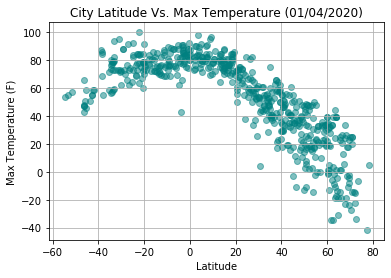

In [11]:
plt.scatter(df["Latitude"], df["Max F"], c = "teal", alpha = 0.5, marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude Vs. Max Temperature ({time.strftime("%m/%d/%Y")})')
plt.grid()
plt.savefig("latitude_vs_maxtemp.png")

plt.show()

#### Latitude vs. Humidity Plot

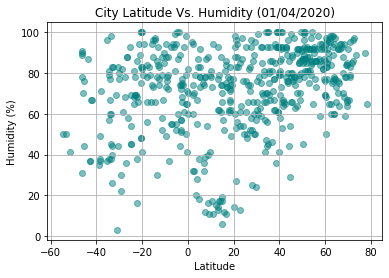

In [12]:
plt.scatter(df["Latitude"], df["Humidity"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

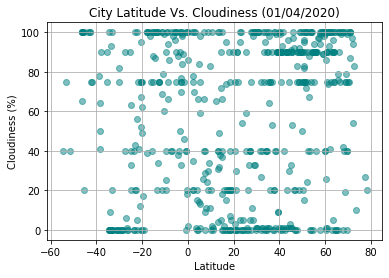

In [13]:
plt.scatter(df["Latitude"], df["Clouds"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

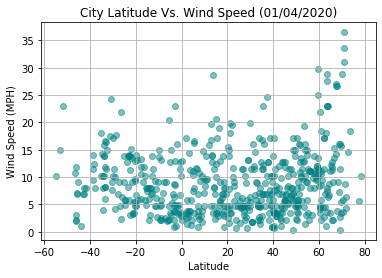

In [14]:
plt.scatter(df["Latitude"], df["Wind Speed"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("latitude_vs_windspeed.png")

plt.show()